# Kernel Density Estimation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## What is Density Estimation?

Suppose we have a method of computing or observing random samples of a continuous random variable $X$ however we do not know its probability distribution function $f(x)$. The goal of density estimation is to approximate $f(x)$ using a collection random samples of $X$. The simplest kind of density estimation is simply to plot the histogram of the samples.

For example, let $X_1 \sim Exp(\lambda_1)$ and $X_2 \sim Exp(\lambda_2)$ and let $Y = X_1 + X_2$. Compute random samples and plot the histogram.

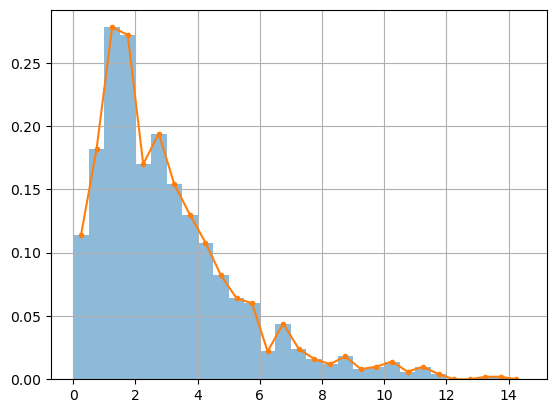

In [3]:
N = 1000
X1 = stats.expon.rvs(scale=1,size=N)
X2 = stats.expon.rvs(scale=2,size=N)
Y = X1 + X2
freqs,bins,_ = plt.hist(Y,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
mids = (bins[:-1] + bins[1:])/2
plt.plot(mids,freqs,'.-')
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) for more information.
:::

## Kernel Functions

A **kernel** is a function $K : \mathbb{R} \rightarrow \mathbb{R}$ such that $K(x) \ge 0$ and $K(x) = K(-x)$ for all $x \in \mathbb{R}$, and $\int_{-\infty}^{\infty} K(x) \, dx = 1$. In other words, a kernel function is a symmetric probability density function. For example:

The **triangular** kernel function is

$$
K(x) = \left\{ \begin{array}{ccc} 1-|x| & , & |x| \le 1 \\ 0 & , & x > 1 \end{array} \right.
$$

The **rectangular** kernel function is

$$
K(x) = \left\{ \begin{array}{ccc} 1/2 & , & |x| \le 1 \\ 0 & , & x > 1 \end{array} \right.
$$

The **gaussian** kernel function is

$$
K(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

The **parabolic** kernel function is

$$
K(x) = \left\{ \begin{array}{ccc} \frac{3}{4}(1 - x^2) & , & |x| \le 1 \\ 0 & , & x > 1 \end{array} \right.
$$

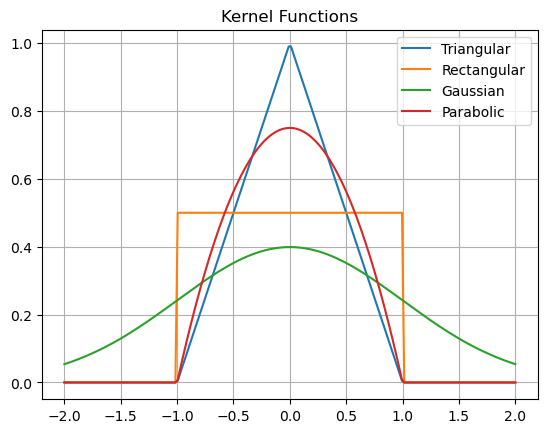

In [4]:
# u(x) = 1 if |x| < 1
u = lambda x: np.heaviside(x + 1,1) - np.heaviside(x - 1,1)

x = np.linspace(-2,2,200)
K1 = (1 - np.abs(x))*u(x)
K2 = 0.5*u(x)
K3 = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
K4 = 0.75*(1 - x**2)*u(x)

plt.plot(x,K1,label = 'Triangular')
plt.plot(x,K2,label = 'Rectangular')
plt.plot(x,K3,label = 'Gaussian')
plt.plot(x,K4,label = 'Parabolic')
plt.title('Kernel Functions'), plt.legend(), plt.grid(True)
plt.show()

## Kernel Density Functions

Let $x_1,\dots,x_N$ be samples of a random variable $X$ with unknown probability density function $f(x)$. Choose a **kernel** $K(x)$ and **bandwidth** parameter $h>0$ and define the **kernel density function**

$$
\hat{f}_h(x) = \frac{1}{Nh} \sum \limits_{i=1}^N K \left( \frac{x - x_i}{h} \right)
$$

The function $\hat{f}_h(x)$ is a probabilty density function and is an estimate of $f(x)$. Optimal values of $h$ are determined by methods beyond the scope of this course. However we just recognize that increasing $h$ provides a smoother result but loses some of the shape of the data.

Let's constuct kernel density functions for the example above.

In [5]:
N = 1000
X1 = stats.expon.rvs(scale=1,size=N)
X2 = stats.expon.rvs(scale=2,size=N)
Y = X1 + X2

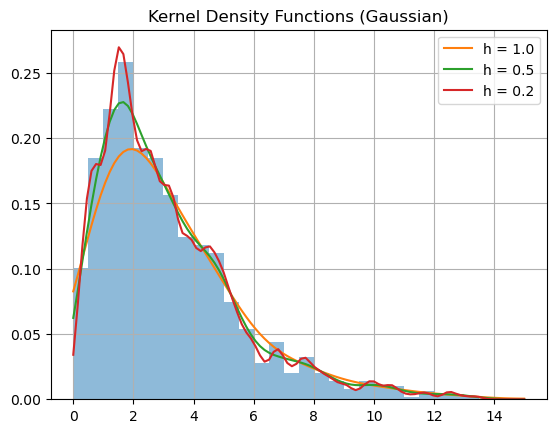

In [6]:
plt.hist(Y,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh = lambda x,h: 1/(len(Y)*h)*sum([K((x - Y[i])/h) for i in range(len(Y))])
x = np.linspace(0,15,100)
plt.plot(x,fh(x,1),label='h = 1.0')
plt.plot(x,fh(x,0.5),label='h = 0.5')
plt.plot(x,fh(x,0.2),label='h = 0.2')
plt.title('Kernel Density Functions (Gaussian)'), plt.legend(), plt.grid(True)
plt.show()

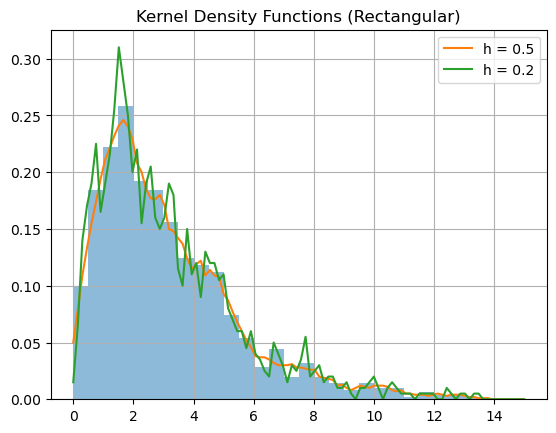

In [7]:
plt.hist(Y,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
K = lambda x: 0.5*u(x)
fh = lambda x,h: 1/(len(Y)*h)*sum([K((x - Y[i])/h) for i in range(len(Y))])
x = np.linspace(0,15,100)
plt.plot(x,fh(x,0.5),label='h = 0.5')
plt.plot(x,fh(x,0.1),label='h = 0.2')
plt.title('Kernel Density Functions (Rectangular)'), plt.legend(), plt.grid(True)
plt.show()

## KDE with SciPy

The function `scipy.stats.gaussian_kde` computes the kernel density function with the gaussian kernel. It automatically computes the optimal bandwidth parameter. We can also specify the bandwidth by setting the value of the `bw_method` parameter. Let's again compute kernel density functions for the example above.

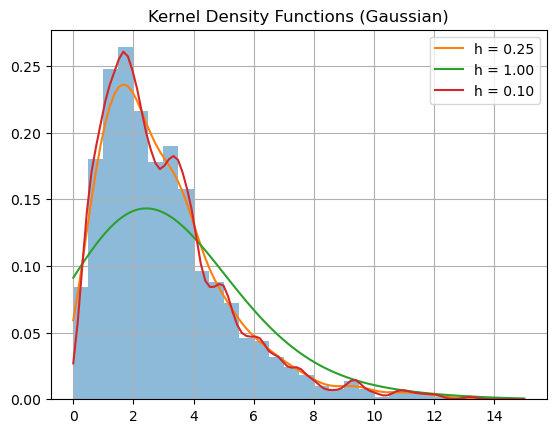

In [9]:
N = 1000
X1 = stats.expon.rvs(scale=1,size=N)
X2 = stats.expon.rvs(scale=2,size=N)
Y = X1 + X2

plt.hist(Y,bins=np.arange(0,15,0.5),density=True,alpha=0.5)
kde1 = stats.gaussian_kde(Y)
kde2 = stats.gaussian_kde(Y,bw_method=1)
kde3 = stats.gaussian_kde(Y,bw_method=0.1)

x = np.linspace(0,15,100)
plt.plot(x,kde1(x),label='h = {:.2f}'.format(kde1.factor))
plt.plot(x,kde2(x),label='h = 1.00')
plt.plot(x,kde3(x),label='h = 0.10')
plt.title('Kernel Density Functions (Gaussian)'), plt.legend(), plt.grid(True)
plt.show()

:::{seealso}
Check out the [SciPy tutorial](https://docs.scipy.org/doc/scipy/tutorial/stats.html#kernel-density-estimation) on kernel density estimation.
:::